In [40]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

1.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
import pandas as pd
data=pd.read_csv('deva walk and fall.csv')

In [4]:
data.head(10)

,time,gFx,gFy,gFz,TgF,activity
0,5.607,0.5201,0.7910,0.1875,0.965,walking
1,5.609,0.5155,0.7976,0.1844,0.967,walking
2,5.611,0.5204,0.7979,0.1873,0.971,walking
3,5.613,0.5189,0.8037,0.1880,0.975,walking
4,5.615,0.5238,0.8084,0.1900,0.982,walking
5,5.617,0.5228,0.8113,0.1929,0.984,walking
6,5.619,0.5265,0.8133,0.1976,0.989,walking
7,5.620,0.5233,0.8147,0.1995,0.989,walking
8,5.622,0.5199,0.8189,0.1995,0.990,walking
9,5.624,0.5216,0.8164,0.2027,0.990,walking


In [5]:
data.tail(10)

,time,gFx,gFy,gFz,TgF,activity
13376,2.884,0.3609,0.7661,0.5061,0.987,walk_fall
13377,2.890,0.3291,0.7622,0.4876,0.963,walk_fall
13378,2.892,0.3052,0.7532,0.4898,0.949,walk_fall
13379,2.893,0.2915,0.7453,0.5034,0.945,walk_fall
13380,2.894,0.2893,0.7392,0.5139,0.946,walk_fall
13381,2.897,0.2966,0.7324,0.5332,0.953,walk_fall
13382,2.901,0.3052,0.7236,0.5626,0.966,walk_fall
13383,2.906,0.3137,0.7150,0.5845,0.975,walk_fall
13384,2.907,0.3223,0.7170,0.5985,0.988,walk_fall
13385,2.907,0.3164,0.7172,0.6153,0.997,walk_fall


In [6]:
data.isnull().sum()

time        0
gFx         0
gFy         0
gFz         0
TgF         0
activity    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      13386 non-null  float64
 1   gFx       13386 non-null  float64
 2   gFy       13386 non-null  float64
 3   gFz       13386 non-null  float64
 4   TgF       13386 non-null  float64
 5   activity  13386 non-null  object 
dtypes: float64(5), object(1)
memory usage: 627.6+ KB


In [8]:
activities = data['activity'].value_counts().index
activities

Index(['walking', 'walk_fall'], dtype='object')

In [9]:
data['activity'].value_counts()

walking      9241
walk_fall    4145
Name: activity, dtype: int64

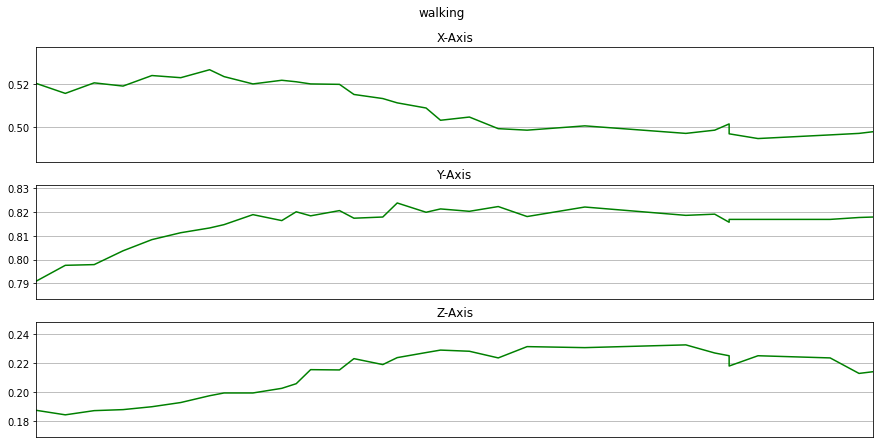

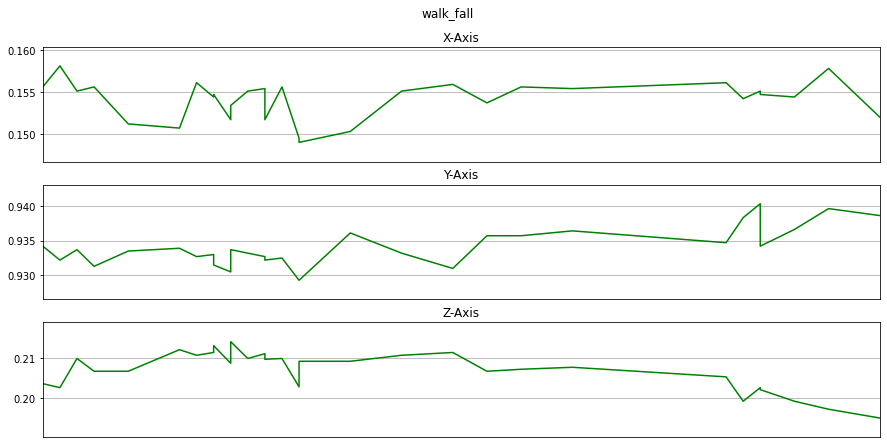

In [10]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['gFx'], 'X-Axis')
    plot_axis(ax1, data['time'], data['gFy'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['gFz'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:30]
    plot_activity(activity, data_for_plot)

In [11]:
df = data.drop(['time'], axis = 1).copy()
df.head()

,gFx,gFy,gFz,TgF,activity
0,0.5201,0.7910,0.1875,0.965,walking
1,0.5155,0.7976,0.1844,0.967,walking
2,0.5204,0.7979,0.1873,0.971,walking
3,0.5189,0.8037,0.1880,0.975,walking
4,0.5238,0.8084,0.1900,0.982,walking


In [12]:
Walking = df[df['activity']=='walking'].head(4145).copy()
fall = df[df['activity']=='walk_fall'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, fall])
balanced_data.shape


(8290, 5)

In [13]:
balanced_data['activity'].value_counts()

walk_fall    4145
walking      4145
Name: activity, dtype: int64

In [14]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,gFx,gFy,gFz,TgF,activity,label
0,0.5201,0.7910,0.1875,0.965,walking,1
1,0.5155,0.7976,0.1844,0.967,walking,1
2,0.5204,0.7979,0.1873,0.971,walking,1
3,0.5189,0.8037,0.1880,0.975,walking,1
4,0.5238,0.8084,0.1900,0.982,walking,1


In [15]:
label.classes_

array(['walk_fall', 'walking'], dtype=object)

In [16]:
X = balanced_data[['gFx', 'gFy', 'gFz']]
y = balanced_data['label']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['gFx', 'gFy', 'gFz'])
scaled_X['label'] = y.values

scaled_X.head()

,gFx,gFy,gFz,label
0,0.461716,0.196431,0.056415,1
1,0.453301,0.211432,0.048275,1
2,0.462265,0.212114,0.055890,1
3,0.459521,0.225297,0.057728,1
4,0.468484,0.235980,0.062980,1


In [18]:
scaled_X.tail()

,gFx,gFy,gFz,label
8285,0.052863,0.063238,0.964205,0
8286,0.068595,0.043236,1.041408,0
8287,0.084144,0.023689,1.098916,0
8288,0.099876,0.028235,1.135680,0
8289,0.089083,0.028689,1.179796,0


In [19]:
import scipy.stats as stats

In [20]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [21]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['gFx'].values[i: i + frame_size]
        y = df['gFy'].values[i: i + frame_size]
        z = df['gFz'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((206, 80, 3), (206,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [23]:
X_train.shape, X_test.shape

((164, 80, 3), (42, 80, 3))

In [24]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [25]:
X_train = X_train.reshape(164, 80, 3, 1)
X_test = X_test.reshape(42, 80, 3, 1)

In [26]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [27]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [28]:
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [29]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Train on 164 samples, validate on 42 samples
Epoch 1/10
164/164 [==============================] - 1s 3ms/step - loss: 1.1923 - acc: 0.6707 - val_loss: 0.4621 - val_acc: 1.0000
Epoch 2/10
164/164 [==============================] - 0s 267us/step - loss: 0.4101 - acc: 0.8902 - val_loss: 0.1227 - val_acc: 0.9762
Epoch 3/10
164/164 [==============================] - 0s 298us/step - loss: 0.1704 - acc: 0.9634 - val_loss: 0.0617 - val_acc: 0.9762
Epoch 4/10
164/164 [==============================] - 0s 243us/step - loss: 0.2059 - acc: 0.9695 - val_loss: 0.0388 - val_acc: 1.0000
Epoch 5/10
164/164 [==============================] - 0s 237us/step - loss: 0.1548 - acc: 0.9573 - val_loss: 0.0270 - val_acc: 1.0000
Epoch 6/10
164/164 [==============================] - 0s 249us/step - loss: 0.1115 - acc: 0.9695 - val_loss: 0.0195 - val_acc: 1.0000
Epoch 7/10
164/164 [==============================] - 0s 243us/step - loss: 0.1596 - acc: 0.9756 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 8/10
164/164 

In [30]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

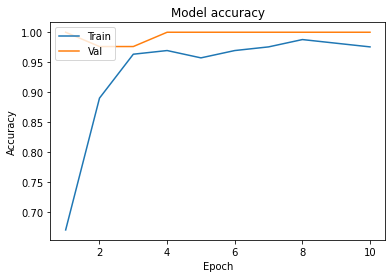

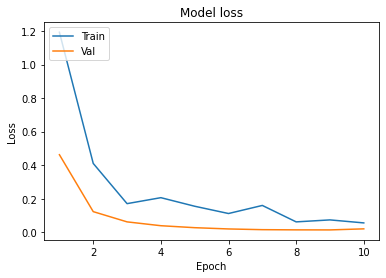

In [31]:
plot_learningCurve(history,10)

In [32]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

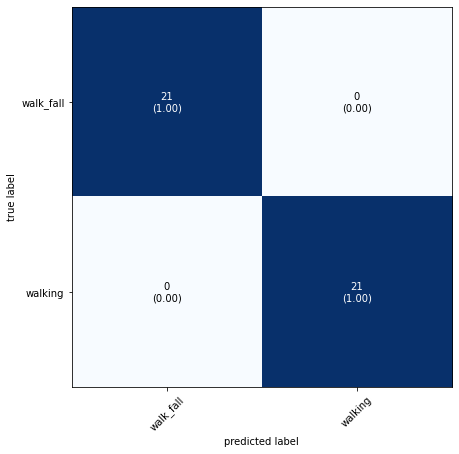

In [34]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 2, 16)         80        
_________________________________________________________________
dropout (Dropout)            (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2496)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                159808    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [35]:
model.save_weights('model.h5')

In [36]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
import tensorflow.contrib
from tensorflow.contrib import lite
from keras import from_keras_model

ImportError: cannot import name 'from_keras_model'

In [67]:
converter = tensorflow.contrib.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'